## Final Project Submission

Please fill out:
* Student name: Ryan Beck
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


**Project Objective:** Clean, explore, and model this the Kings County Data Set with a multivariate linear regression to predict the sale price of houses as accurately as possible.

Project Outline/Workplan:
1. Determine Research Questions
2. Import Data and Format
    * Set up environment
    * Import data as dataframe
    * Learn basic shape and features of data
3. Data Cleaning
    * Identify and deal with duplicates
    * Identify and deal with missing data
    * Identify and deal with inconsitent data
4. Data Exploration
    * Create initial visualizations to better understand data
        * Histograms - ScatterMatrix
    * Form hypotheses about which data are most important
        * Regression plots
5. Feature Engineering
    * Select important features and construct more meaningful ones from raw data
        * Deal with categorical variables: dummies, bin, or drop
        * Normalize and scale features where necessary
6. Develop Model
    * Fit model
7. Vizualize and Present Findings

## Research Questions 

1. Given available data, to what degree of confidence can we predict housing prices? 
2. What factors contribute to predicted housing price most significantly? 

## Our Data

In [1]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

# Read the King's County dataframe with Pandas and assign it to the variable df
df = pd.read_csv('kc_house_data.csv')
# Make sure everytingh has been imported correctly and get a first look at the top five rows of data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Print a summary of the dataframe and make initial observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


**Initial Observations:** 
* The dataframe is 21 columns wide and has 21,597 entries 
* 'waterfront', 'yr_renovated', and 'view' appear to be missing values
* 'sqft_basement' is oddly coded as an object
* 'date' is also an object - I'm not sure if this is normal and will look further into it when cleaning the data

## Data Cleaning

### Duplicate Entries

As a first step to cleaning the data we'll check to see how may duplicate entries may exist. This is a good first step because it may reduce the total number of entries that may need to be cleaned, which implies that dropping may be easier for columns with low numbers of missing or inconsistent values.

In [3]:
# Select duplicate rows except first occurrence based on all columns
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


Great! There are no rows that are completely dublicated. But there may still be duplicate values to know about, so let's check to see if 'id' has any duplicates. 

In [4]:
# Select duplicate values of 'id' except first occurrence 
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 177 duplicate values of id, which represent 0.008% of all entries.


This is interesting, but not necessarily a problem. It may mean that homes with the same 'id' have been sold multiple times, since the 'id' is duplicated, but entire rows are not. Additionally, as 'id' could be an index, but likely not a predictor that will be used later in our model, we can keep these duplicate values in for now and keep an eye on them later if they do present problems.

### Missing data

Next, we can look at the three columns of data we noticed earlier had missing values: 'waterfront', 'yr_renovated', and 'view'. First, let's get a count of how many missing values there are in the data set and make sure we didn't miss any earlier

In [5]:
#Count the number of missing values for all columns in the data and return the name
# and count of those that do
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


It looks like these are the only three with missing values. Let's get an idea of what percentage of the data the missing values represent.

In [6]:
for v in (['waterfront', 'view', 'yr_renovated']):
    print(f'{v} is missing {round(df[v].isna().sum()/len(df)*100,3)}% of its values')

waterfront is missing 11.002% of its values
view is missing 0.292% of its values
yr_renovated is missing 17.79% of its values


Lets explore each of these one-by-one, starting with 'view'. 

'view' is only missing values for .29% of all entries, which means we can likely drop those rows without losing much fidelity in our data. Let's take a deeper look at 'view' to learn more about it first. 

In [7]:
#check the total number of unique values of 'view'
display(df.view.nunique())
df.view.unique()

5

array([ 0., nan,  3.,  4.,  2.,  1.])

There are only 5 unique values of 'view' which means it is a categorical variable. Let's see how those values are distributed.

In [8]:
df.view.value_counts(normalize=True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

With the value 0.0 accounting ~90% of values for 'view' we are presented with a choice. We could reassign the 63 missing values to 0.0 and likely be safe, or just drop the rows, as they represent less than a half of a percent of the overall data. In this case we'll drop the rows. 

In [9]:
# drop all rows that have a null value for 'view' and check to see how it has changed our data
df.dropna(axis=0, subset=['view'], inplace=True)
print(f'Are there any null values: {df.view.isna().any()}\n')
df.info()

Are there any null values: False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)


We have successffully dropped the 63 entries with null values for 'view', next we will assess 'waterfront'.

We know from our analysis above that there are 2376 missing values for 'waterfront', which represents ~11% of total values. This is a more significant portion of the data, so we do not want to drop it. Our alternatives are to impute the missing data, or to label it 'missing'. Let's learn more about the characteristics of 'waterfront' to decide.

In [10]:
#check the total number of unique values of 'waterfront'
display(df.waterfront.nunique())
df.waterfront.unique()

2

array([nan,  0.,  1.])

It appears that 'waterfront' is also categorical data, and further, it is binary, which may lead to easy imputing based on the distribution of values.

In [11]:
# check to see how the values for 'waterfront' are distributed.
df.waterfront.value_counts(normalize=True)

0.0    0.992434
1.0    0.007566
Name: waterfront, dtype: float64

Over 99% of values for water front are 0. We now have another option, we can just assign the missing values to 0, or we can round our values to assign ~99% of missing values to 0, and ~1% to 1. Let's try the latter. 

In [12]:
# Set all the null values in 'waterfront' equal to '?' to make them easier to work with
df['waterfront'].fillna("?", inplace=True)

#establish the weights of the variables to be imputed - based on weight of known values
wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

#create a function to randomly assign the desired values to the null value ('?') by weight of known values
def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
# apply the function to the dataframe
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

#check to see how the funciton has been applied
print(f'Are there any null values: {df.waterfront.isna().any()}\n')
display(df.info())
df['waterfront'].value_counts(normalize=True)

Are there any null values: False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)


None

0.0    0.992245
1.0    0.007755
Name: waterfront, dtype: float64

Excellent, we now see that the null values for water front have been completely replaced, and the distribution of values remains rougly the same as before. 

Finally we will clean up the null values for 'yr_renovated'. As shown above there are 3842 missing values, representing over 17% of the data. This too many rows to drop, so we will learn more about 'yr_renovated' to see how we might approach replacing the values. If it turns out that the values are too difficult to impute, we can always drop the column, but as renovations are something that likely have some influence on final price, it would be preferable to keep. 

In [13]:
#check the total number of unique values of 'yr_renovated'
print(f'There are {df.yr_renovated.nunique()} unique values.')
df.yr_renovated.unique()

There are 70 unique values.


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

It turns out there are a lot of diffent values for 'yr_rennovated', including 0. This could mean that a house has never been renovated, but is also problematic because it may also be a placeholder value, and may disrupt getting simple descriptors like mean, median, mode. Let's look further at those. 

count    17704.000000
mean        83.765025
std        400.239690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

0.0       0.958032
2014.0    0.004123
2003.0    0.001751
2013.0    0.001751
2007.0    0.001695
Name: yr_renovated, dtype: float64

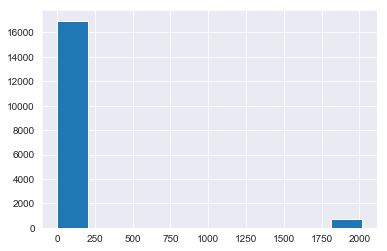

In [14]:
#Determine the mean, median, mode and distribution of values for 'yr_renovated'
display(df['yr_renovated'].describe())
display(df.yr_renovated.hist())
df.yr_renovated.value_counts(normalize=True).head()

95% of the known values for 'yr_renovated' are 0, with all other values representing less than .5% of overall data each. This results in 0 for both median and mode, and a mean value (83.7) which is untenable as a date. Considering this, along with the very wide range of values, it might be wise to drop the column altogether. Alternately, we can create a dummy variable that indicates whether or not a house hase been renovated at all, after replacing the null values with 0 and known values with 1. 

With less than 5% of houses having a renovation accounted for, it is unlikely that this will be a significnat predictor of price. Therefore we will drop the yr_renovated column. 

Note: considering the diminishing returns of renovations, another approach would be to bin the 'yr_renovated' values into more or less recently renovated homes. We can revist later if we find we do not have enough to make decently complex and accurate model. 

In [15]:
# Drop 'yr_renovated'
df.drop(labels=['yr_renovated'], axis=1, inplace=True)

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Inconsistent Data

Now that we have removed all of the null values, we can check to see if there are any other things we should deal with, like placeholders or extreme outliers, before moving forward. We've already observed that 'sqft_basement' is suspiciously an object. We can check the rest of the values as well before we clean that up. 

In [17]:
# check the central tendencies of all columns for odd distributions
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.007755,0.233863,3.409724,7.657425,1788.557537,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.087723,0.765686,0.650654,1.172643,827.745641,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


At this time no values stand out as having abnormal min, max, std, or mean. We'll check for other extraneous values. 

In [18]:
#Check the top five occuring values from each column to see if there are any that stand out
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006594
6/26/2014    0.006083
6/25/2014    0.006083
7/8/2014     0.005898
4/27/2015    0.005758
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454676
4    0.318798
2    0.127891
5    0.074115
6    0.012538
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006408
1400    0.006223
1440    0.006176
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016578
6000    0.013467
4000    0.011656
7200    0.010216
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494242
2.0    0.381304
1.5    

A quick review of all columns shows than none of the top 5 values in any appear to be abnormal, except for 'sqft_basement', which has a placeholder '?' for approximately 2% of it's values. This explains why 'sqft_basement' currently appears as an object. Our options for this include dropping the records with '?', or imputing a value based on central tendencies (mean or median likely). Let's first figure out what those are. 

In [19]:
# isolate the values of 'sqft_basement' that are recorded and convert them to a float so 
# that we can observe traits
new_basement = df[df['sqft_basement'] != '?']
new_basement.sqft_basement.astype('float').describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

'sqft_basement' appears to be very skewed, with more than half of values being 0. Nevertheless, it appears we may be able to replace '?' with the average basement value without significantly changing the overall distribution. 

In [20]:
# set mean value
basement_mean = new_basement.sqft_basement.astype('float').mean()

#create a function to assign the desired values to the null value ('?') 
def impute_basement(value):
    if value == "?":
        return basement_mean
    else:
        return value
# apply the function to the dataframe
df.sqft_basement = df.sqft_basement.map(lambda x: impute_basement(x)).astype('float')

#check to see how the function has been applied
display(df.info())
df['sqft_basement'].value_counts(normalize=True).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.5+ MB


None

0.000000      0.594316
291.359975    0.020990
600.000000    0.010031
500.000000    0.009706
700.000000    0.009613
Name: sqft_basement, dtype: float64

In [21]:
#check to see how much central tendencies were affected
df.sqft_basement.describe()

count    21534.000000
mean       291.359975
std        437.344152
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

The std and 75th quartile were slightly affected, but overall appears to be generally unaffected. 

### Adjusting Dates

Now, the last piece to deal with is the date column. It's currently an object, so we won't be able to use that for any analysis. But time of year likely does have some relation to housing prices, as housing markets tend to heat up in the summer. So, to make this more workable data, we can convert the date column to a datatime dtype and and then create two new columns with  day of the year and month values. We'll disregard the year for now because the date column reflects when the house was sold in the past. Those values can't be repeated again in the future, so they may not have much as predictive power for future prices.

note: a potential predictor could be 'years since last sold' 

In [22]:
# Import datetime and create two new columns for 'day of year' and 'month'
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
# check the values of our new columns
display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [23]:
# Check dateframe to see that new columns are present
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,286,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,343,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,343,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,49,2


The two new columns are created and at this point our data appear to be clean. We have:
* Checked for duplicates
* Droped 63 rows with null values for 'view'
* Imputed 2376 missing values for 'waterfront' 
* Dropped the 'yr_renovated' column with it's 3842 missing values
* Imputed missing values for 'sqft_basement' and converted it to a float
* Created two new columns with values for 'day_of_year' and 'month'

Now on to deeper exploration of the data. 

## Data Exploration

In this section we'll take a more visual view at the data and begin to learn more about it. Using histograms, count/bar charts, box plots, and heatmaps we'll seek to learn more about data we want to include in our model. 

In [24]:
# 
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

id: 21357
date: 371
price: 3613
bedrooms: 12
bathrooms: 29
sqft_living: 1033
sqft_lot: 9760
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 11
sqft_above: 942
sqft_basement: 302
yr_built: 116
zipcode: 70
lat: 5029
long: 750
sqft_living15: 776
sqft_lot15: 8663
day_of_year: 355
month: 12


In [25]:
# create new df without date, id

In [26]:
# 
lower_count_values = []
for col in df:
    if df[col].nunique() <= 1034:
        lower_count_values.append(col)

lower_count_values = lower_count_values[1:]
lower_count_values

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'long',
 'sqft_living15',
 'day_of_year',
 'month']

In [27]:
# df2 = df.drop(['date'], axis=1)

# for column in df2:
#     plt.scatter(df2[column], df2.price, label=column)
#     plt.legend()
#     plt.show()

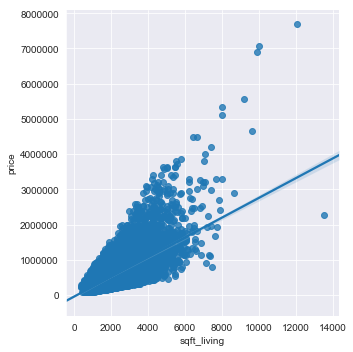

In [34]:
sns.lmplot(x="sqft_living", y="price", data=df);

In [29]:
def seaborn_plotter(independent_vs, dependent_v, df):
    for i in independent_vs:
        print ("Kings County Data Set - Exploratory Data Analysis for: " + i)
        print ("-------------------------------------------------------------------------------------")
        plt.figure(figsize=(15,15))
        ax1 = plt.subplot(2,2,1)
        ax2 = plt.subplot(2,2,2)
        ax3 = plt.subplot(2,2,3)
        ax4 = plt.subplot(2,2,4)
        
        a = sns.boxplot(x=i, y=dependent_v, data=df, ax=ax3)
        a.axes.set_title('Boxplot' ,fontsize=20)
        a.set_xlabel(i,fontsize=15)
        a.set_ylabel('Price', fontsize=15)
        a.tick_params(labelsize=10)
        
        b = sns.countplot(df[i], ax=ax4)
        b.axes.set_title('Variable Count' ,fontsize=20)
        b.set_xlabel(i,fontsize=15)
        b.set_ylabel('Count', fontsize=15)
        b.tick_params(labelsize=10)
        
        c = sns.scatterplot(x=i, y=dependent_v, data=df, ax=ax1, legend='brief')
        c.axes.set_title('Scatterplot' ,fontsize=20)
        c.set_xlabel(i,fontsize=15)
        c.set_ylabel('Price', fontsize=15)
        c.tick_params(labelsize=10)
        
        d = sns.distplot(df[i], ax=ax2)
        d.axes.set_title('Histogram',fontsize=20)
        d.set_xlabel(i,fontsize=15)
        d.set_ylabel('KDE', fontsize=15)
        d.tick_params(labelsize=10)
        
        plt.show()
        input('Observations: ')
        input('Keep for now: ')
        print("\n")

In [30]:
# cut the number of columns down to the ones we want to look at for exploratory data analyses 
# (not included:'id','date','price')
df_eda = df.iloc[:,3:22]
df_eda.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,286,10
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,343,12
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,56,2
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,343,12
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,49,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
day_of_year      21534 non-null int64
month            21534 non-null int64
dtypes: datetime64[ns](1), flo

Kings County Data Set - Exploratory Data Analysis for: bedrooms
-------------------------------------------------------------------------------------


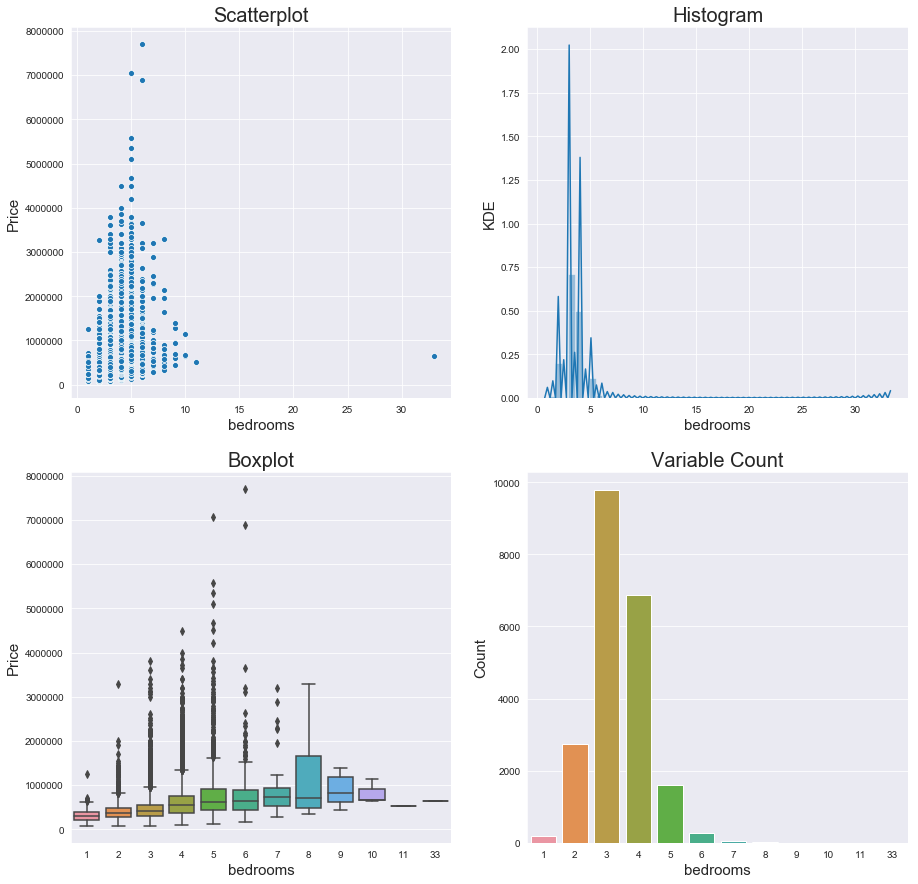

Observations: aef
Keep for now: sadf


Kings County Data Set - Exploratory Data Analysis for: bathrooms
-------------------------------------------------------------------------------------


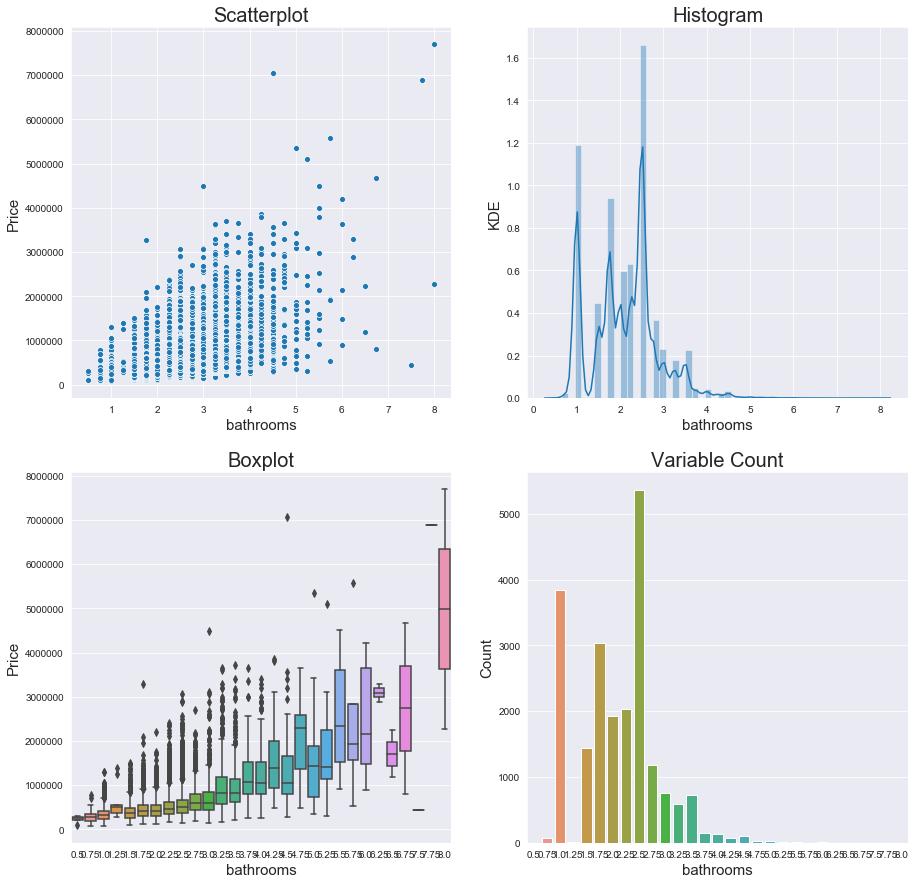

Observations: saddf
Keep for now: asdf


Kings County Data Set - Exploratory Data Analysis for: sqft_living
-------------------------------------------------------------------------------------


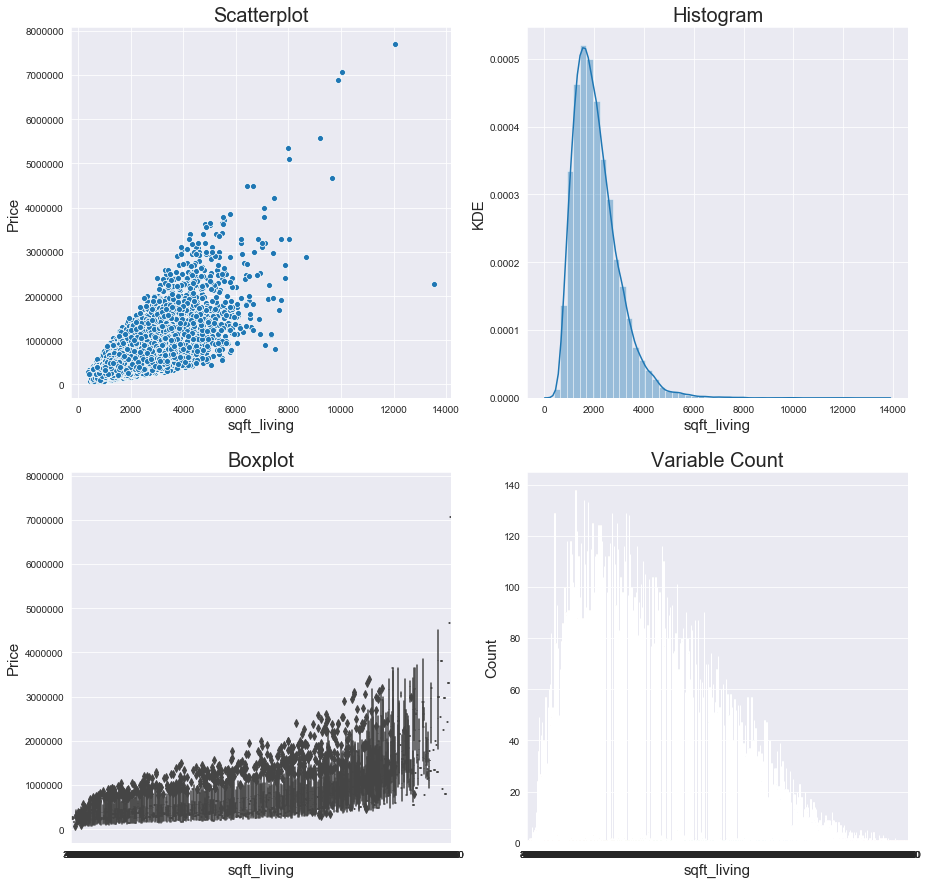

Observations: szdf
Keep for now: xdf]


Kings County Data Set - Exploratory Data Analysis for: floors
-------------------------------------------------------------------------------------


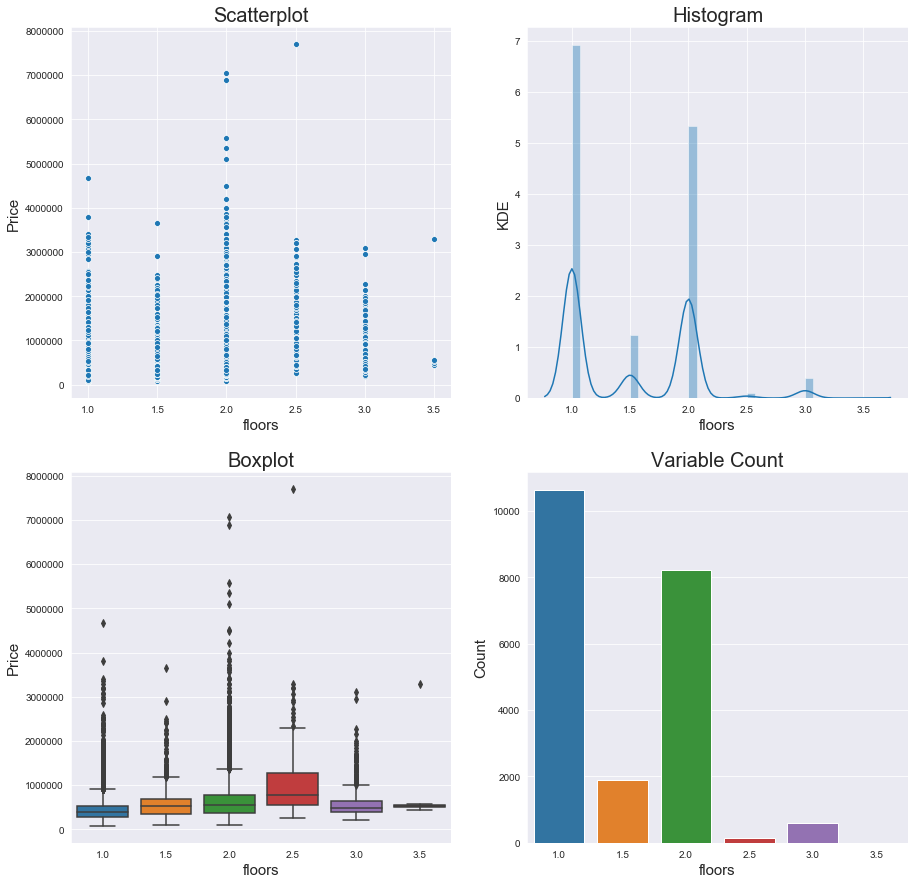

Observations: asdf
Keep for now: ds


Kings County Data Set - Exploratory Data Analysis for: waterfront
-------------------------------------------------------------------------------------


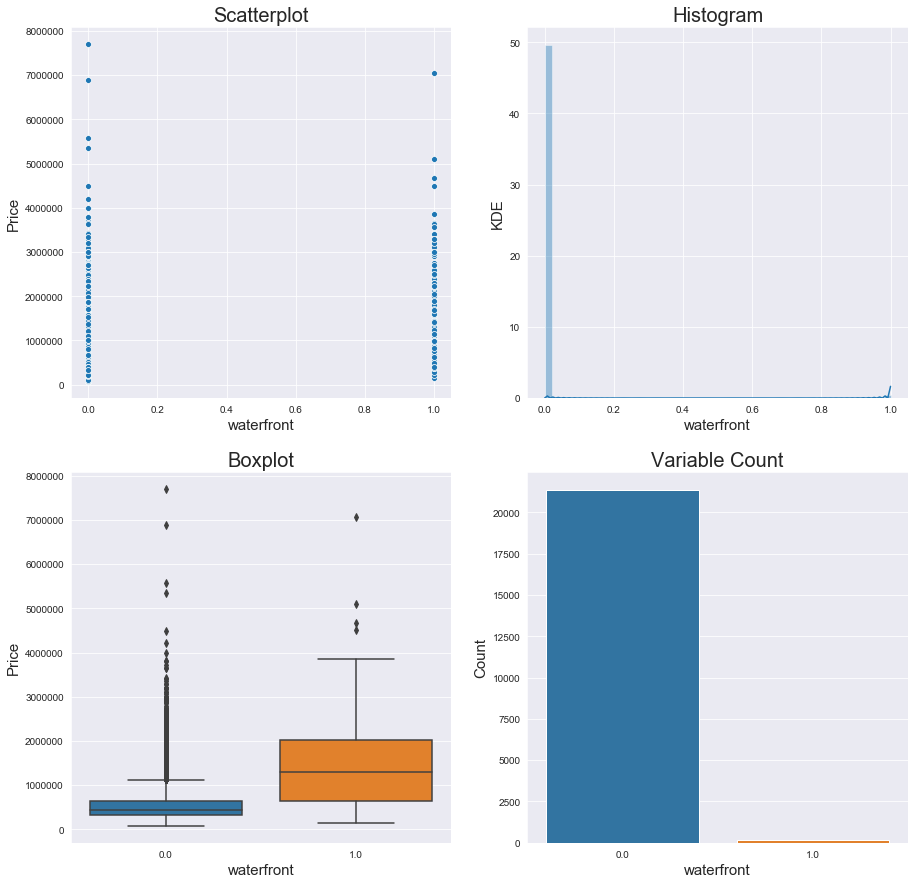

Observations: sf
Keep for now: asdf


Kings County Data Set - Exploratory Data Analysis for: view
-------------------------------------------------------------------------------------


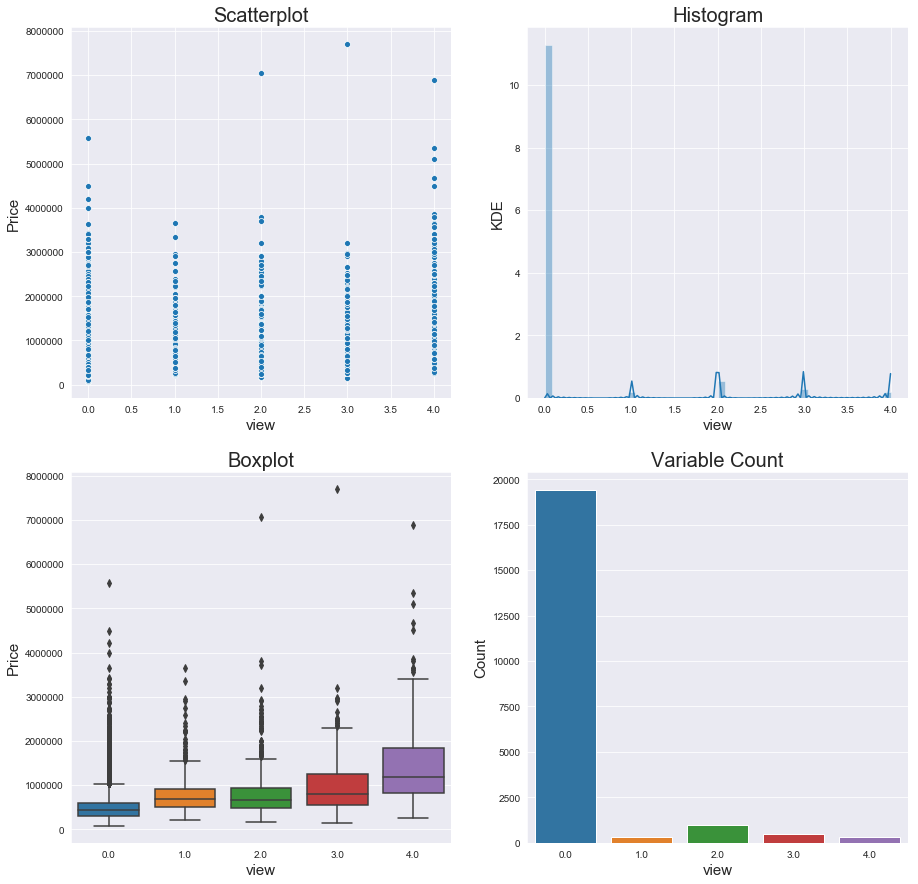

Observations: adsf
Keep for now: adsf


Kings County Data Set - Exploratory Data Analysis for: condition
-------------------------------------------------------------------------------------


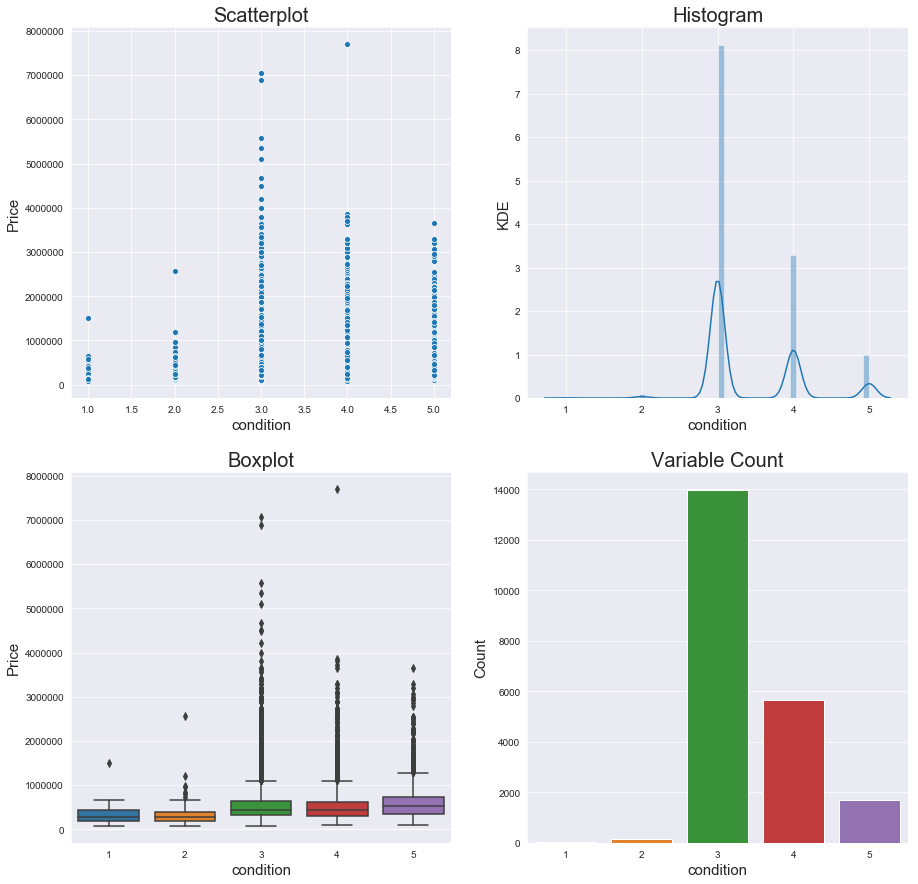

Observations: sadf
Keep for now: sdf


Kings County Data Set - Exploratory Data Analysis for: grade
-------------------------------------------------------------------------------------


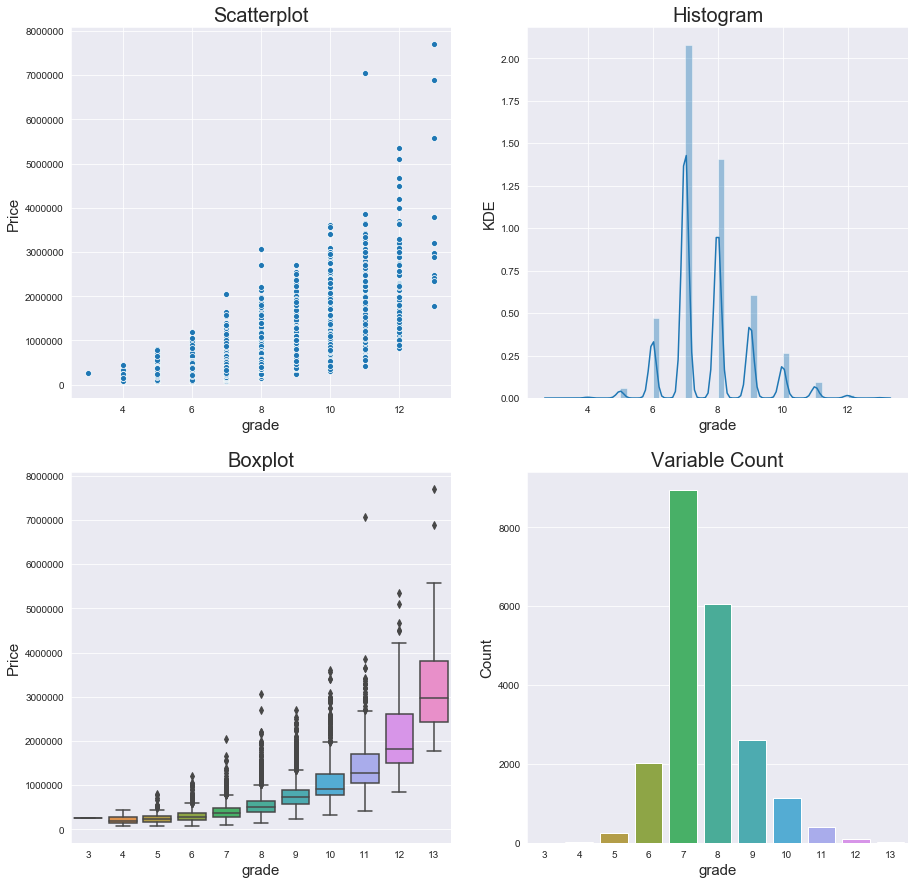

Observations: sfd
Keep for now: dsf


Kings County Data Set - Exploratory Data Analysis for: sqft_above
-------------------------------------------------------------------------------------


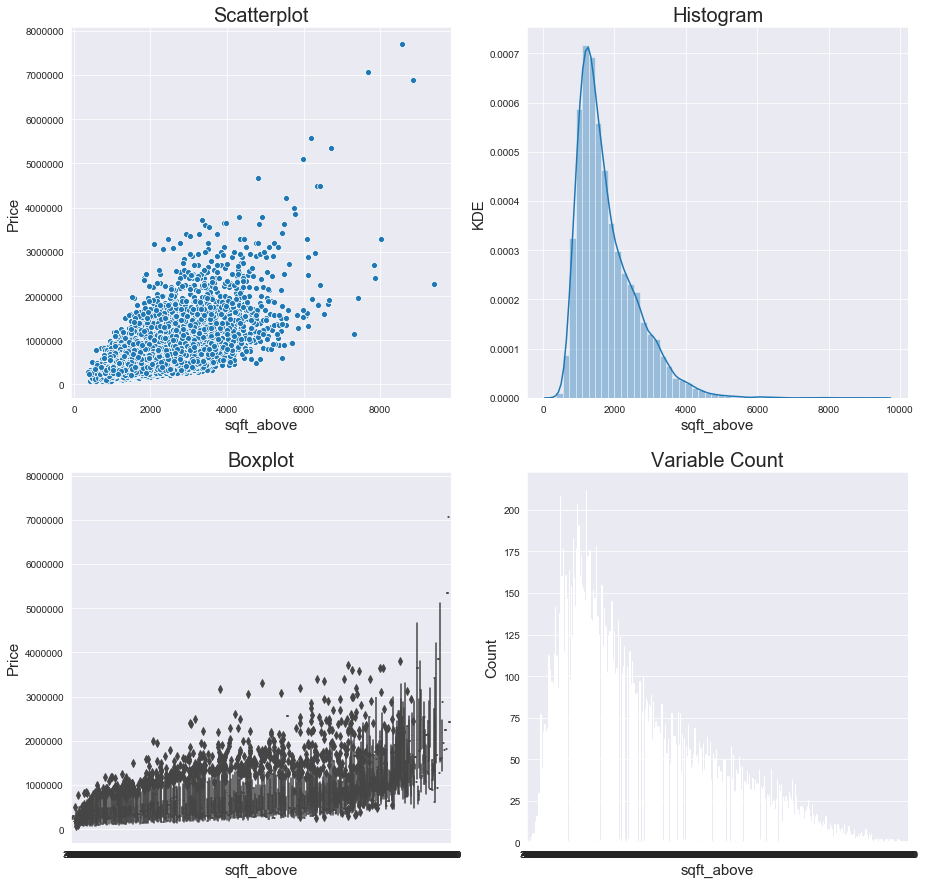

Observations: asdf
Keep for now: asdf


Kings County Data Set - Exploratory Data Analysis for: sqft_basement
-------------------------------------------------------------------------------------


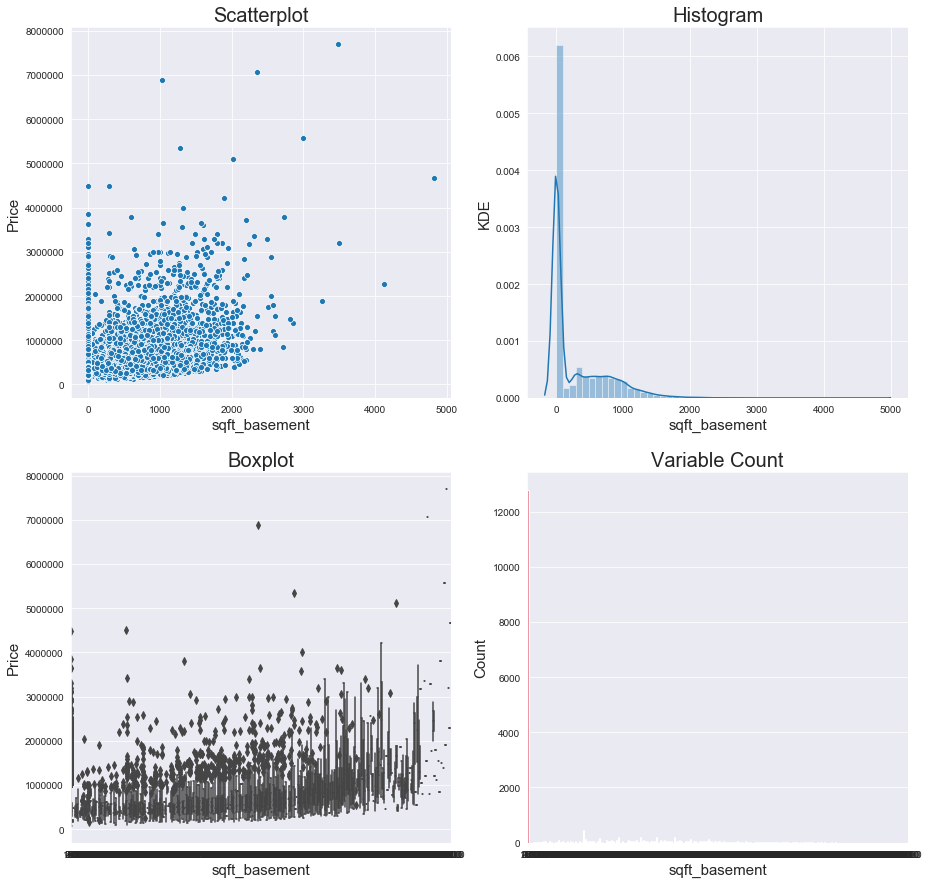

Observations: asdf
Keep for now: adf


Kings County Data Set - Exploratory Data Analysis for: yr_built
-------------------------------------------------------------------------------------


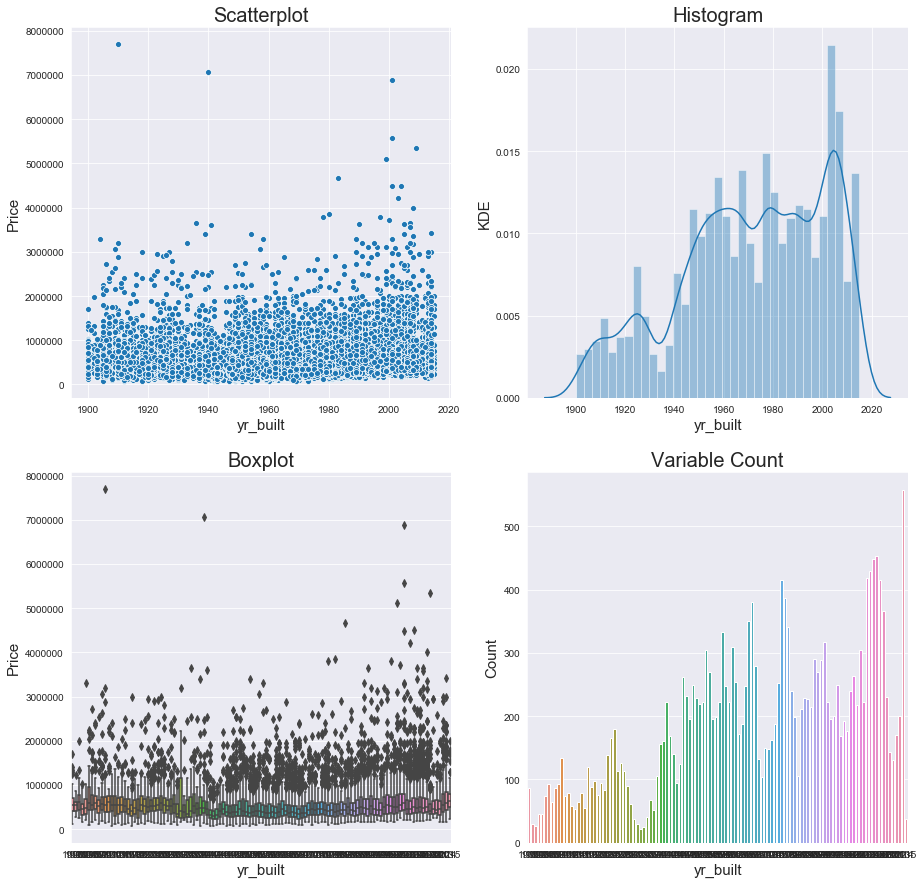

Observations: zsdf
Keep for now: sadf


Kings County Data Set - Exploratory Data Analysis for: zipcode
-------------------------------------------------------------------------------------


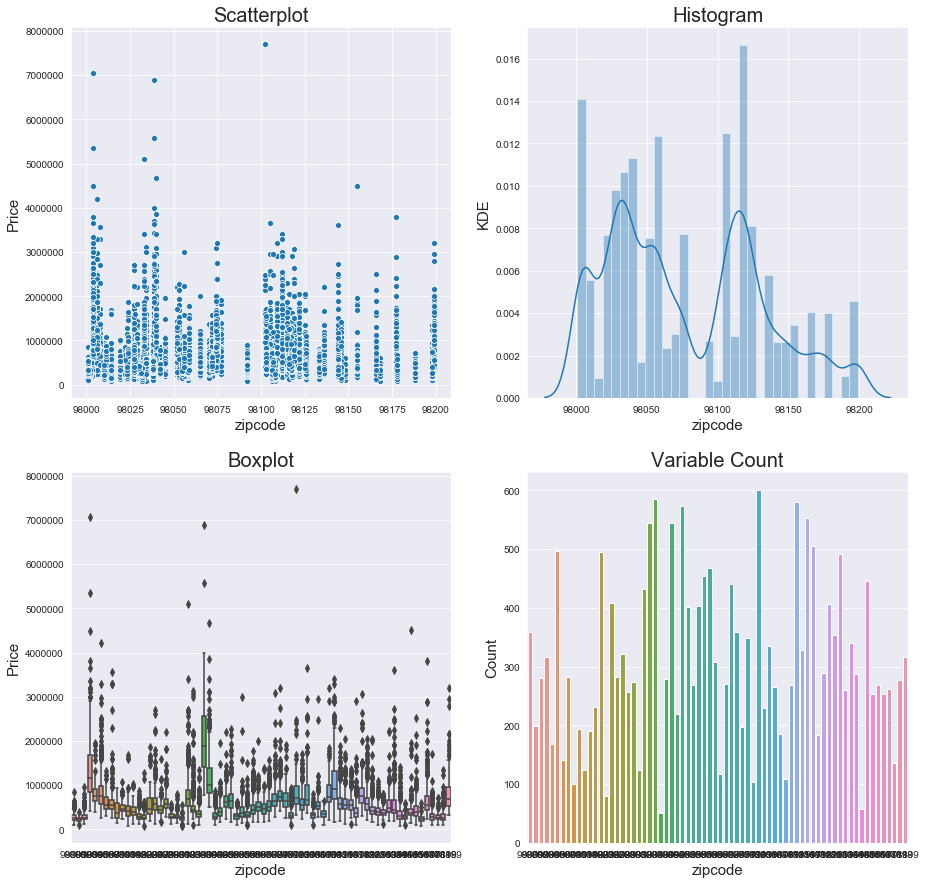

Observations: zfd
Keep for now: asdf


Kings County Data Set - Exploratory Data Analysis for: long
-------------------------------------------------------------------------------------


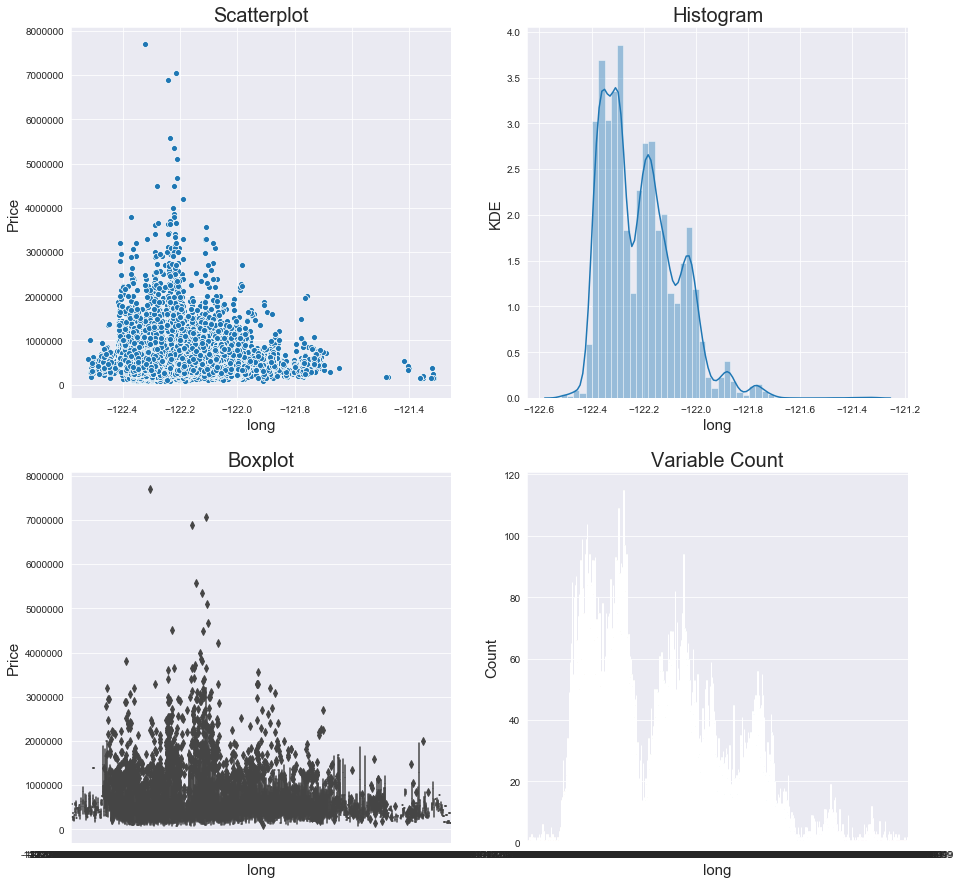

Observations: sdfa
Keep for now: asfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF AS


Kings County Data Set - Exploratory Data Analysis for: sqft_living15
-------------------------------------------------------------------------------------


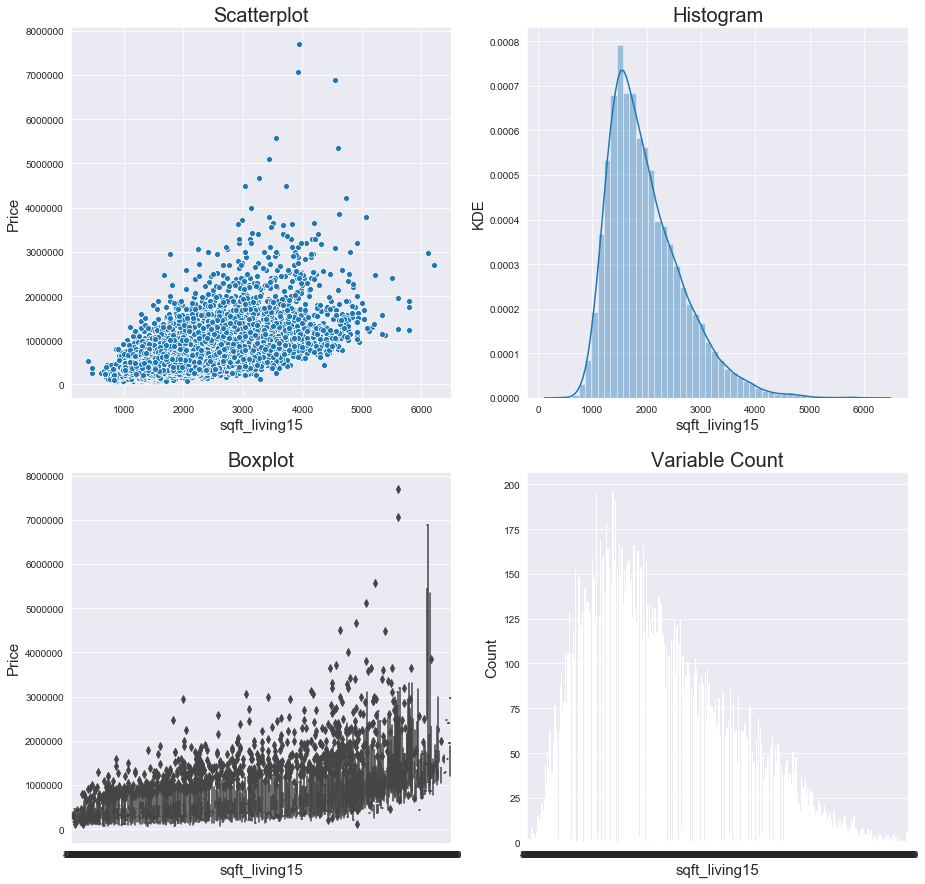

Observations: ASDF sfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF ASsfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF ASsfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF ASsfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF ASsfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF ASsfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF ASsfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF ASsfdasdffa sd  sd ASD AS ASD ASDF ASDF ASDF ASD FASDF ASDF ASDF ASDF ASDF ASDF ASF ASDFASDF AS
Keep for now: ZSDF


Kings County Data Set - Exploratory Data Analysis for: day_of_year
-------------------------------------------------------------------------------------


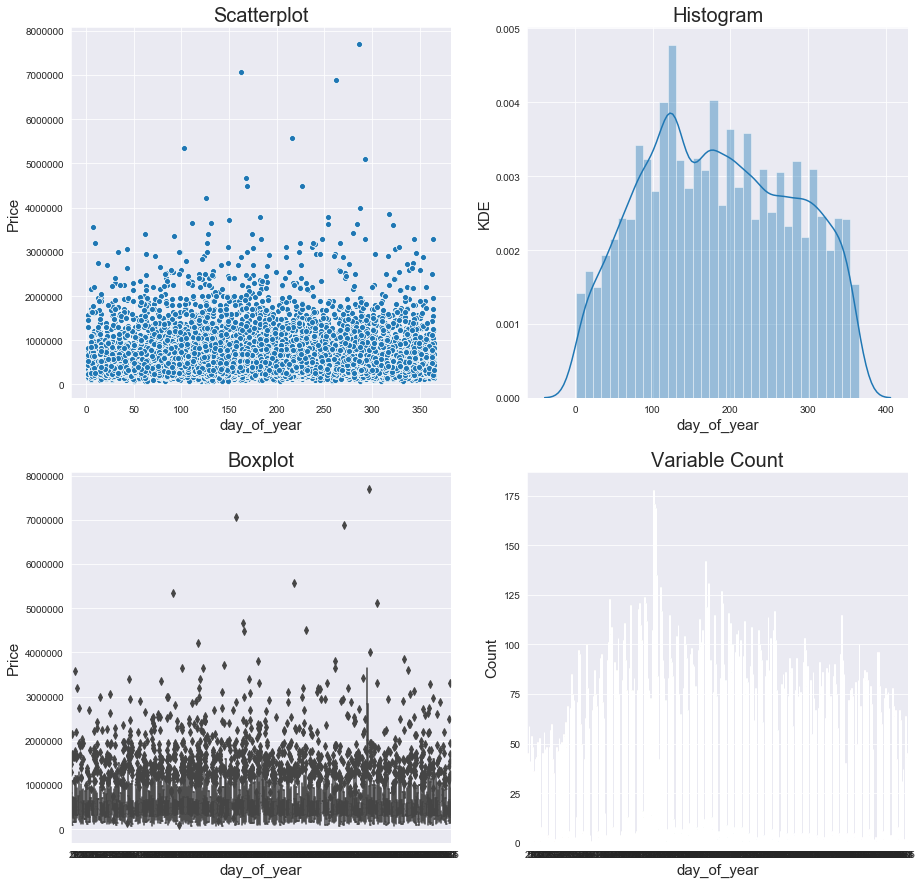

Observations: ,;'L;LK
Keep for now: KLJKJLK


Kings County Data Set - Exploratory Data Analysis for: month
-------------------------------------------------------------------------------------


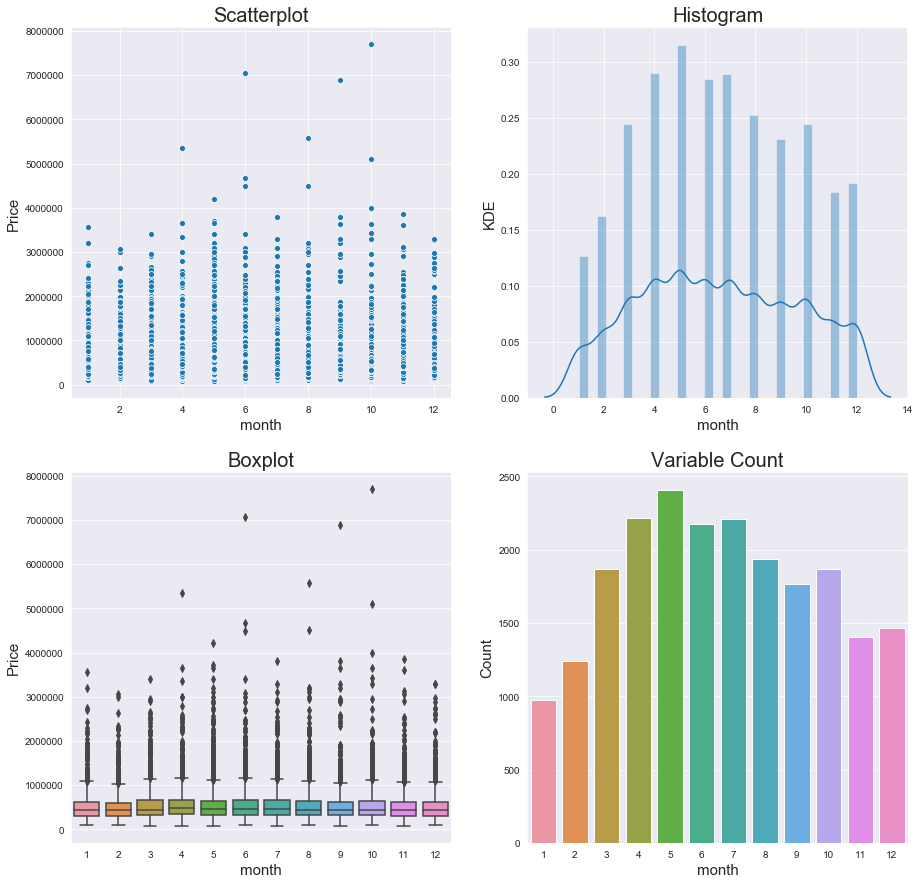

Observations: S:Fj
Keep for now: asd;fj




In [33]:
seaborn_plotter(lower_count_values, df.price, df)

In [ ]:
print(len(df.columns))
list(df.columns[3:22])

In [ ]:
df['waterfront'].nunique()

In [ ]:
# plt.figure(figsize=(10,15))
# ax1 = plt.subplot(2,1,1)
# b1 = sns.boxplot(x='bathrooms', y='price', data=df, ax=ax1);

# ax2 = plt.subplot(2,1,2)
# ax2 = sns.countplot(df.bathrooms, ax=ax2)

In [ ]:
# groups = df.groupby(['month'])['price'].mean()
# plt.figure(figsize=(10, 5))
# plt.xlabel('price')
# groups.plot.barh()

In [ ]:
# plt.figure(figsize=(20,6))
# sns.countplot(df.zipcode)

In [ ]:
# groups = df.groupby(['zipcode'])['price'].mean()
# plt.figure(figsize=(10, 20))
# plt.xlabel('price')
# groups.plot.barh()

In [ ]:
# checking multi-colinearity
data_corr = df.drop(['price', 'date', 'id'], axis=1)
sns.heatmap(data_corr.corr(), center=0);

In [ ]:
abs(data_corr.corr()) >= .75

In [ ]:
df.corr()

In [ ]:
sns.heatmap(abs(df_eda.corr()), center=0);

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

f = 'price~sqft_living'
model = smf.ols(formula=f, data=df).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
plt.show()